<a href="https://colab.research.google.com/github/Kzarama/machine_learning/blob/master/modeloCreado/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
#torch.set_printoptions(edgeitems=2) #default 3
#torch.manual_seed(123)

# Construyendo modelo
---



In [2]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [0]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


dog
cat
cat
bird



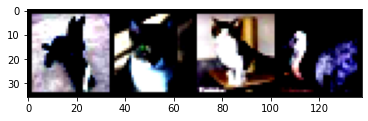

In [4]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [0]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [6]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [0]:
model = nn.Sequential(
            nn.Linear(3 * 32 * 32, 512),
            nn.Tanh(),
            nn.Linear(512, 2))

In [0]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

In [9]:
x = torch.tensor([1.0, 2.0, 3.0])

sigmoid(x)

tensor([0.7311, 0.8808, 0.9526])

In [10]:
sigmoid(x).sum()

tensor(2.5644)

In [0]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [12]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [13]:
softmax(x).sum()

tensor(1.)

In [14]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [0]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

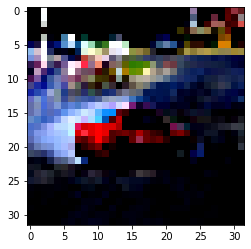

In [16]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [17]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5115, 0.4885]], grad_fn=<SoftmaxBackward>)

In [18]:
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

-> car  model: car


In [19]:
softmax = nn.Softmax(dim=1)

log_softmax = nn.LogSoftmax(dim=1)

x = torch.tensor([[0.0, 110.0]])

softmax(x)

tensor([[0., 1.]])

In [20]:
torch.log(softmax(x))

tensor([[-inf, 0.]])

In [21]:
log_softmax(x)

tensor([[-110.,    0.]])

In [22]:
torch.exp(log_softmax(x))

tensor([[0., 1.]])

# Implementando un clasificador totalmente conectado
---


In [0]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

In [24]:
img, label = data_set[20]

out = model(img.view(-1).unsqueeze(0))

_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

loss(out, torch.tensor([label]))

-> car  model: car


tensor(0.6056, grad_fn=<NllLossBackward>)

In [0]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

In [26]:
learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

lossFunction = nn.NLLLoss()

n_epochs = 5 #100

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = lossFunction(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.002138
Epoch: 1, Loss: 0.256190
Epoch: 2, Loss: 0.008423
Epoch: 3, Loss: 0.682789
Epoch: 4, Loss: 0.046222


In [27]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))


optimizer = optim.SGD(model.parameters(), lr=0.02)

loss_function = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.576956
Epoch: 1, Loss: 0.612004
Epoch: 2, Loss: 0.261986
Epoch: 3, Loss: 0.367171
Epoch: 4, Loss: 0.206471
Epoch: 5, Loss: 0.407691
Epoch: 6, Loss: 0.255130
Epoch: 7, Loss: 0.136577
Epoch: 8, Loss: 0.266645
Epoch: 9, Loss: 0.361360
Epoch: 10, Loss: 0.150611
Epoch: 11, Loss: 0.245121
Epoch: 12, Loss: 0.145958
Epoch: 13, Loss: 0.291419
Epoch: 14, Loss: 0.448863
Epoch: 15, Loss: 0.063963
Epoch: 16, Loss: 0.098690
Epoch: 17, Loss: 0.075172
Epoch: 18, Loss: 0.315863
Epoch: 19, Loss: 0.301868
Epoch: 20, Loss: 0.391469
Epoch: 21, Loss: 0.068019
Epoch: 22, Loss: 0.046235
Epoch: 23, Loss: 0.103248
Epoch: 24, Loss: 0.033197
Epoch: 25, Loss: 0.014572
Epoch: 26, Loss: 0.060069
Epoch: 27, Loss: 0.020750
Epoch: 28, Loss: 0.050289
Epoch: 29, Loss: 0.029528
Epoch: 30, Loss: 0.023137
Epoch: 31, Loss: 0.007781
Epoch: 32, Loss: 0.028957
Epoch: 33, Loss: 0.019604
Epoch: 34, Loss: 0.013505
Epoch: 35, Loss: 0.016960
Epoch: 36, Loss: 0.009897
Epoch: 37, Loss: 0.009650
Epoch: 38, Loss: 0.026

In [28]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.865500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  car  model: car


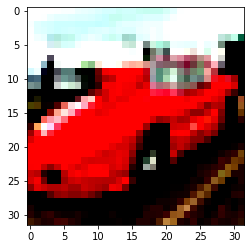

In [29]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

# Mejoras, limitaciones y conclusiones
---


In [30]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.595271
Epoch: 1, Loss: 0.474214
Epoch: 2, Loss: 0.525903
Epoch: 3, Loss: 0.357956
Epoch: 4, Loss: 0.677603
Epoch: 5, Loss: 0.548679
Epoch: 6, Loss: 0.391763
Epoch: 7, Loss: 0.284643
Epoch: 8, Loss: 0.202123
Epoch: 9, Loss: 0.770677
Epoch: 10, Loss: 0.194848
Epoch: 11, Loss: 0.429625
Epoch: 12, Loss: 0.118693
Epoch: 13, Loss: 0.125025
Epoch: 14, Loss: 0.348557
Epoch: 15, Loss: 0.183710
Epoch: 16, Loss: 0.365823
Epoch: 17, Loss: 0.215267
Epoch: 18, Loss: 0.033766
Epoch: 19, Loss: 0.046956
Epoch: 20, Loss: 0.199748
Epoch: 21, Loss: 0.124112
Epoch: 22, Loss: 0.243005
Epoch: 23, Loss: 0.068524
Epoch: 24, Loss: 0.091703
Epoch: 25, Loss: 0.058474
Epoch: 26, Loss: 0.160388
Epoch: 27, Loss: 0.071102
Epoch: 28, Loss: 0.062766
Epoch: 29, Loss: 0.081495
Epoch: 30, Loss: 0.009248
Epoch: 31, Loss: 0.084793
Epoch: 32, Loss: 0.013639
Epoch: 33, Loss: 0.062979
Epoch: 34, Loss: 0.011706
Epoch: 35, Loss: 0.024482
Epoch: 36, Loss: 0.012918
Epoch: 37, Loss: 0.002108
Epoch: 38, Loss: 1.142

In [31]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.862000


In [32]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct:  car  model: cat


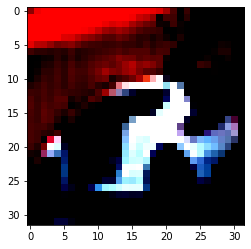

In [33]:
img, label = validation_set[1]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)

print('correct: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))

In [34]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

In [35]:
first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))

sum([p.numel() for p in first_model.parameters()])

1574402

In [36]:
sum([p.numel() for p in nn.Linear(3072, 512).parameters()])

1573376

In [37]:
sum([p.numel() for p in nn.Linear(3072, 1024).parameters()])

3146752

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct: car   model: cat


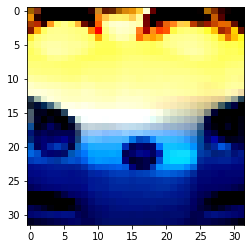

In [38]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))